In [54]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [55]:
#한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family=fontprop.get_name())

In [17]:
data = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\비어플\\1주차 과제\\train.csv',encoding='UTF-8')

In [19]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 1. 데이터 설명
- Date : 일/월/연도
- Rented Bike Count : 대여한 자전거 수
- Hour : 시간
- Temperature : 온도
- Humidity : 습도
- Wind Speed : 바람 세기
- Visibility : 가시거리
- Dew Point Temperature : 노점
- Solar Radiation : 태양 복사 에너지
- Rainfall : 강수량
- Snowfall : 강설량
- Seasons : 계절
- Holiday : 휴일 여부
- Functioning day : 자전거 대여 시스템이 정상적으로 운영되는 날

#### 질문 만들기
- 시간대별 자전거 대여량의 차이
- 연도별 혹은 월별로 자전거 대여 수의 차이
- 가시거리가 짧을 때 자전거 대여량이 어떻게 변하는지
- 다른 기상 조건 (예: 온도, 습도, 강수량)과 결합하여 날씨가 자전거 대여에 미치는 영향

# 2. 데이터 전처리
- 분석에 필요할 연, 월, 일 칼럼 만들기

In [47]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,2018-10-31,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,31
8036,2018-10-31,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes,2018,10,31
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,31
8038,2018-10-31,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,31


In [64]:
data['연도'] = pd.to_datetime(data['Date'],format='%Y%m%d').dt.year
data['월'] = pd.to_datetime(data['Date'],format='%Y%m%d').dt.month
data['일'] = pd.to_datetime(data['Date'],format='%Y%m%d').dt.day
data['요일'] = data['Date'].dt.day_name()
data

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,2018-10-31,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,31,Wednesday
8036,2018-10-31,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes,2018,10,31,Wednesday
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,31,Wednesday
8038,2018-10-31,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,10,31,Wednesday


# 3. 데이터 살펴보기

In [48]:
#기술통계량 확인하기
data.describe()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),연도,월,일
count,8040,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,2018-05-17 00:00:00,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493,2017.907463,6.125373,15.740299
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,2018-02-22 00:00:00,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000,2018.000000,3.000000,8.000000
50%,2018-05-17 00:00:00,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000,2018.000000,6.000000,16.000000
75%,2018-08-09 00:00:00,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000,2018.000000,9.000000,23.000000
max,2018-10-31 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,2018.000000,12.000000,31.000000
std,NaN,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182,0.289801,3.316712,8.809025


In [49]:
#결측값 확인하기
data.isnull().sum() 

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
연도                             0
월                              0
일                              0
dtype: int64

In [51]:
#중복행 확인하기
data[data.duplicated()] 

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일


c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


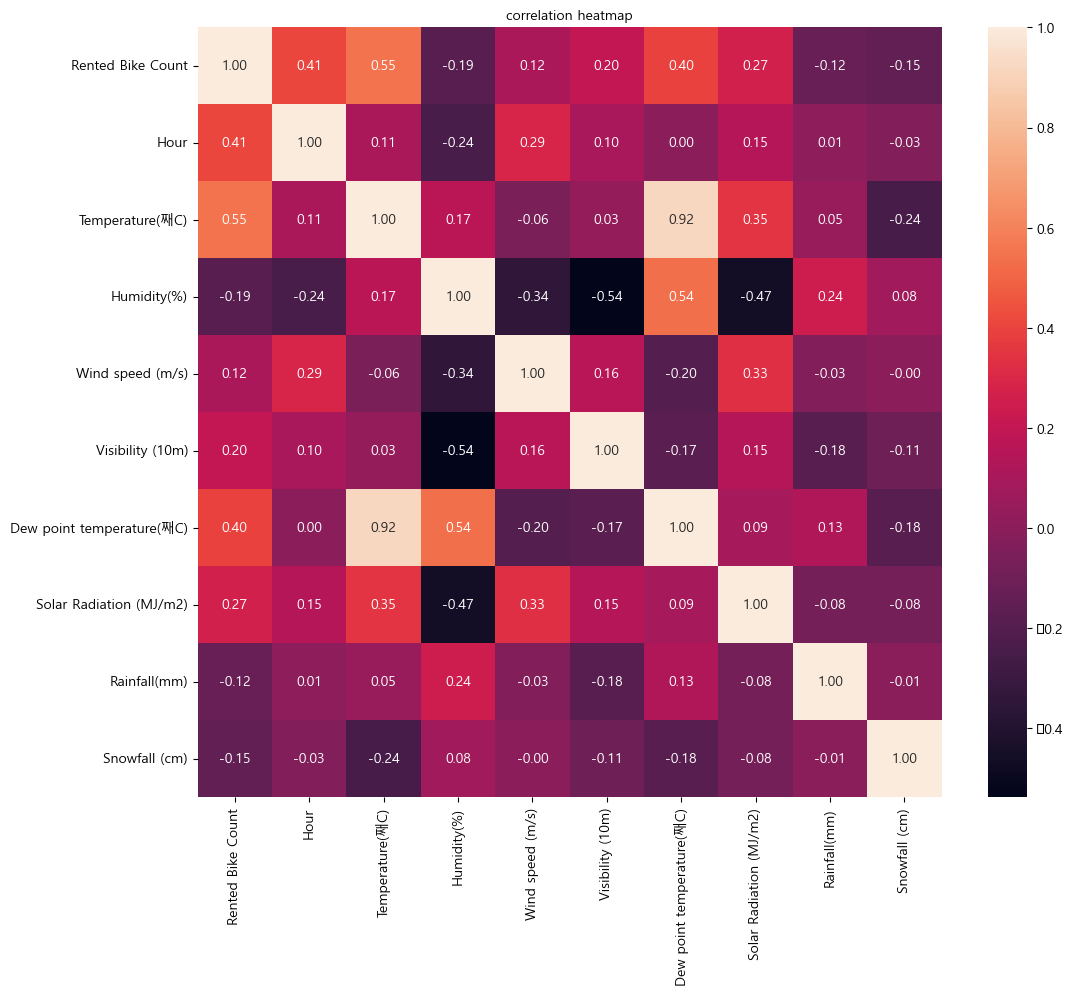

In [57]:
# 상관계수 히트맵 그리기
plt.figure(figsize=(12,10))  #사이즈 조정
sns.heatmap(data[['Rented Bike Count','Hour','Temperature(째C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(째C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True,fmt='.2f') #annot는 값  표기
plt.title('correlation heatmap',fontproperties=fontprop) #상관계수 행렬 히트맵

## 1. 시간대별 대여량

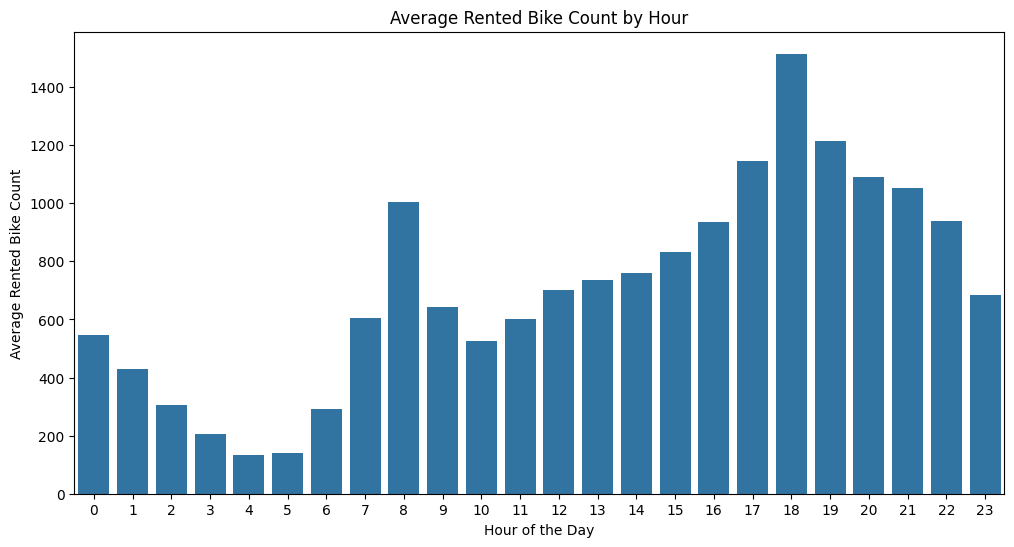

In [34]:
#1. 전체적인 시간대별 대여량 분석
plt.figure(figsize=(12, 6))
hourly_rentals = data.groupby('Hour')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals)
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 18시에 대여량이 가장 많은 것을 확인할 수 있다.

In [43]:
#2. 계절에 따른 시간대별 자전거 대여량의 차이
#계절에 따라 시간대별 자전거 대여량 분석을 위해 계절의 값이 무엇이 있는지 파악한다.
data['Seasons'].value_counts()

Seasons
Spring    1990
Summer    1990
Winter    1935
Autumn    1323
Name: count, dtype: int64

In [45]:
plt.figure(figsize=(12, 6))
season_hourly_rentals = data.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index() #계층적 인덱스를 일반적인 데이터프레임 인덱스로 변환하는 함수
season_hourly_rentals

,Seasons,Hour,Rented Bike Count
0,Autumn,0,694.962963
1,Autumn,1,524.839286
2,Autumn,2,362.175439
3,Autumn,3,261.666667
4,Autumn,4,167.035714
...,...,...,...
91,Winter,19,298.475000
92,Winter,20,240.654321
93,Winter,21,244.536585
94,Winter,22,226.551282


<Figure size 1200x600 with 0 Axes>

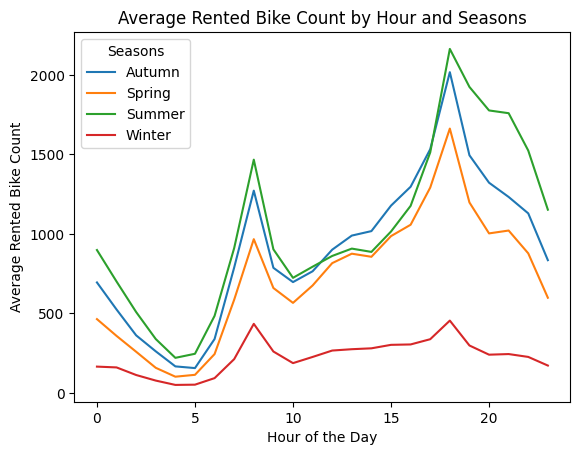

In [46]:
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=season_hourly_rentals)
plt.title('Average Rented Bike Count by Hour and Seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 여름에 대여량이 가장 많고 대여량이 가장 많은 시간대는 15시~20시 사이이다.
- 겨울에 대여량이 가장 적다.

In [58]:
# 3. 휴일 여부에 따른 시간대별 자전거 대여량의 차이
# 휴일 여부에 따라 시간대별 자전거 대여량 분석을 위해 휴일 여부의 값이 무엇이 있는지 파악한다.
data['Holiday'].value_counts()

Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64

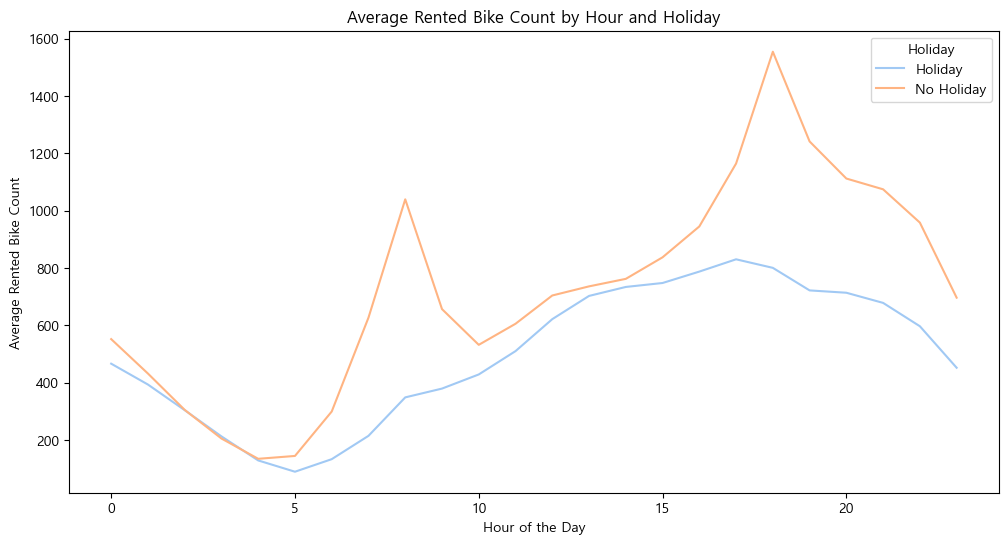

In [60]:
plt.figure(figsize=(12, 6))
holiday_hourly_rentals = data.groupby(['Holiday', 'Hour'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=holiday_hourly_rentals, palette="pastel")
plt.title('Average Rented Bike Count by Hour and Holiday')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 휴일이 아닐 때, 5시-10시 사이, 15시-20시 사이에 자전거 대여량이 가장 많다.
- 휴일일 때는 15시`20시 사이에 자전거 대여량이 가장 많다.

# 2. 연도별, 월별 대여량

In [99]:
data['연도'].value_counts()
#2017년, 2018년의 자료만 있다.

연도
2018    7296
2017     744
Name: count, dtype: int64

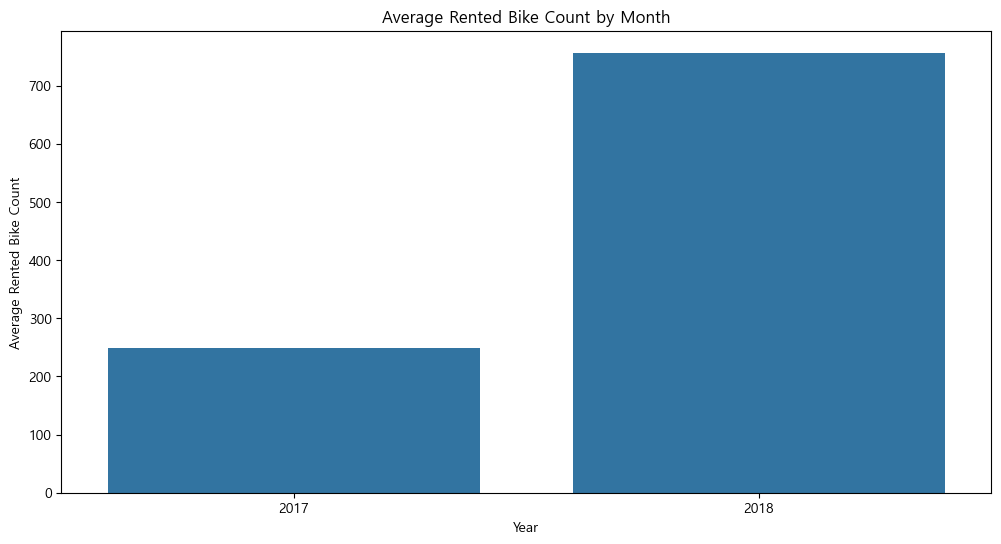

In [101]:
plt.figure(figsize=(12, 6))
monthly_rentals = data.groupby('연도')['Rented Bike Count'].mean()
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values)
plt.title('Average Rented Bike Count by Month')
plt.xlabel('Year')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 2017년보다 2018년에 평균 자전거 대여량이 많다고 하기에는 2017년과 2018년 자료의 양의 차이가 크게 난다.

In [71]:
data['월'].value_counts()
# 11월에 대한 값이 없음을 알 수 있다.

월
12    744
1     744
3     744
10    744
5     744
8     744
7     744
6     720
4     720
9     720
2     672
Name: count, dtype: int64

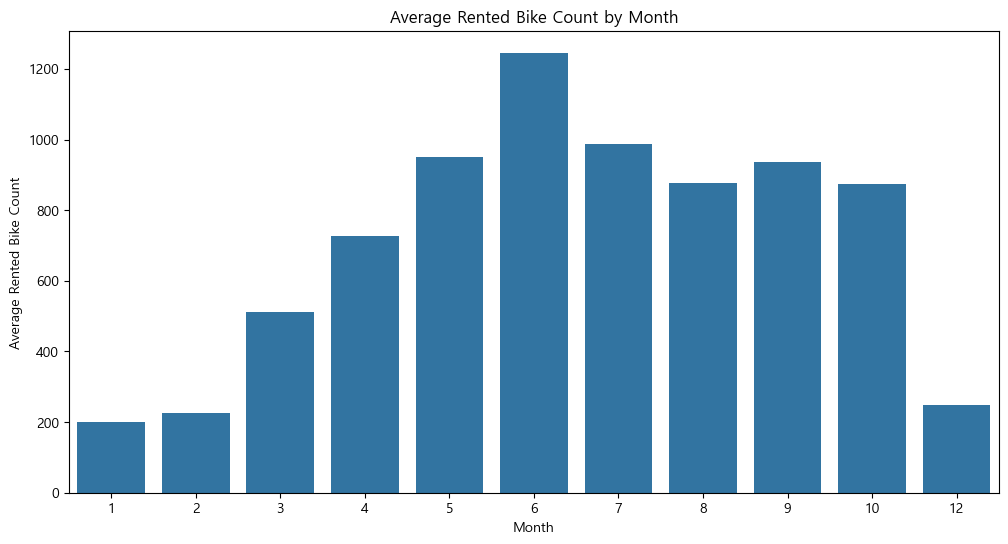

In [62]:
plt.figure(figsize=(12, 6))
monthly_rentals = data.groupby('월')['Rented Bike Count'].mean()
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values)
plt.title('Average Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 6월에 자전거 대여량이 가장 많다는 것을 확인할 수 있다.

# 3. 요일별 대여량

In [65]:
# 2. 요일에 따른 월별 자전거 대여량
data['요일'].value_counts()

요일
Friday       1152
Saturday     1152
Sunday       1152
Monday       1152
Tuesday      1152
Wednesday    1152
Thursday     1128
Name: count, dtype: int64

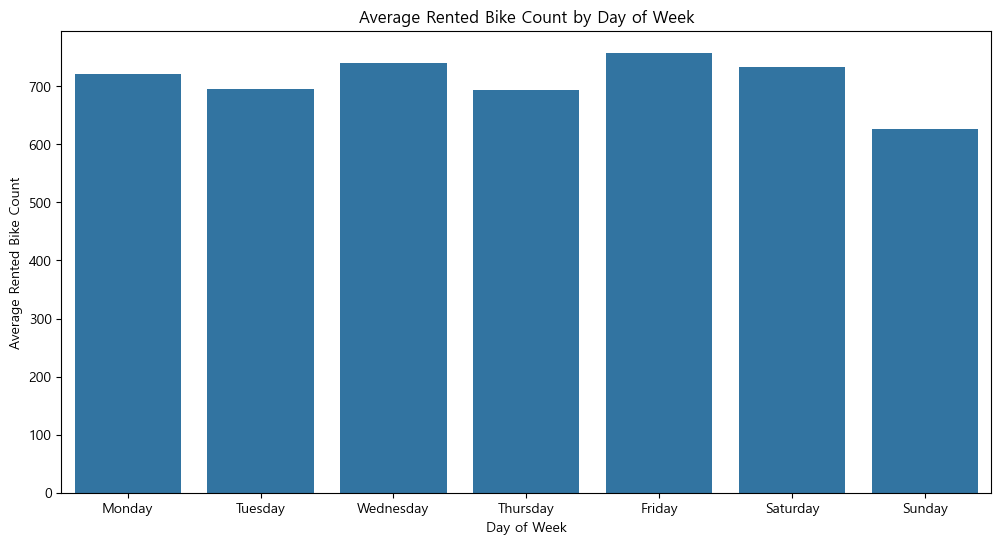

In [69]:
plt.figure(figsize=(12, 6))
day_of_week_rentals = data.groupby('요일')['Rented Bike Count'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_of_week_rentals.index, y=day_of_week_rentals.values)
plt.title('Average Rented Bike Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 일요일의 자전거 대여량이 다른 요일에 비해 적은 편이지만 요일에 따른 자전거 대여량의 큰 차이는 없어보인다.

# 4. 공휴일과 평일의 대여량 차이

In [75]:
data['Holiday'].value_counts()

Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64

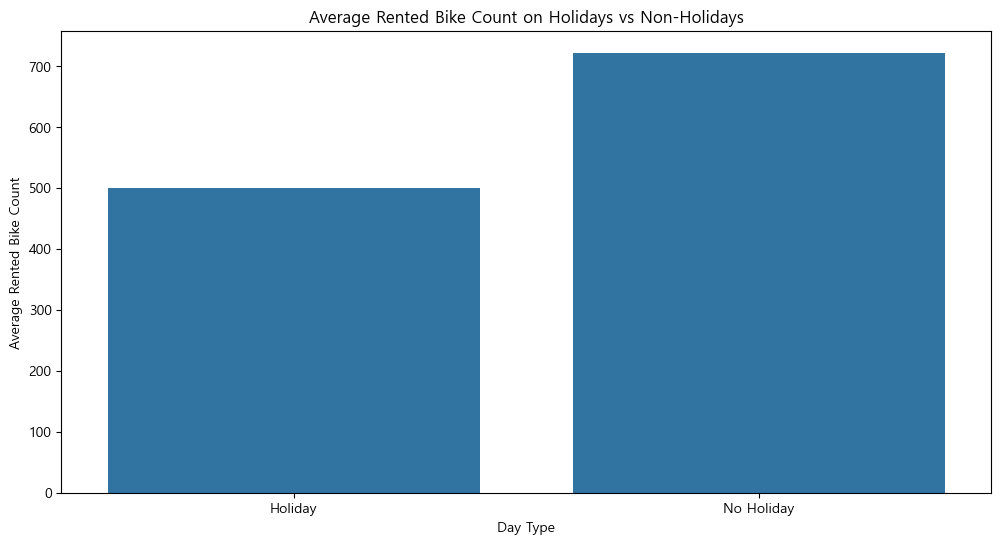

In [74]:
plt.figure(figsize=(12, 6))
holiday_rentals = data.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rentals)
plt.title('Average Rented Bike Count on Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 공휴일보다 평일에 평균 자전거 대여량이 더 많다.
- 공휴일보다 평일의 자료가 훨씬 많다.

In [78]:
#공휴일이면 대여 시스템이 운영을 하고 그렇지 않을 경우 반대인지 확인하기
functioning_holiday = data.groupby(['Functioning Day', 'Holiday']).size().reset_index(name='Count')
functioning_holiday

,Functioning Day,Holiday,Count
0,No,Holiday,24
1,No,No Holiday,199
2,Yes,Holiday,408
3,Yes,No Holiday,7409


# 5. 가시거리에 따른 자전거 대여량의 차이

In [114]:
data['Visibility_Bin'].value_counts()

Visibility_Bin
1500-2000    4728
1000-1500    1238
500-1000     1142
0-500         932
Name: count, dtype: int64

C:\Users\pro_1030\AppData\Local\Temp\ipykernel_16708\3514510376.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visibility_rentals = data.groupby('Visibility_Bin')['Rented Bike Count'].mean().reset_index()


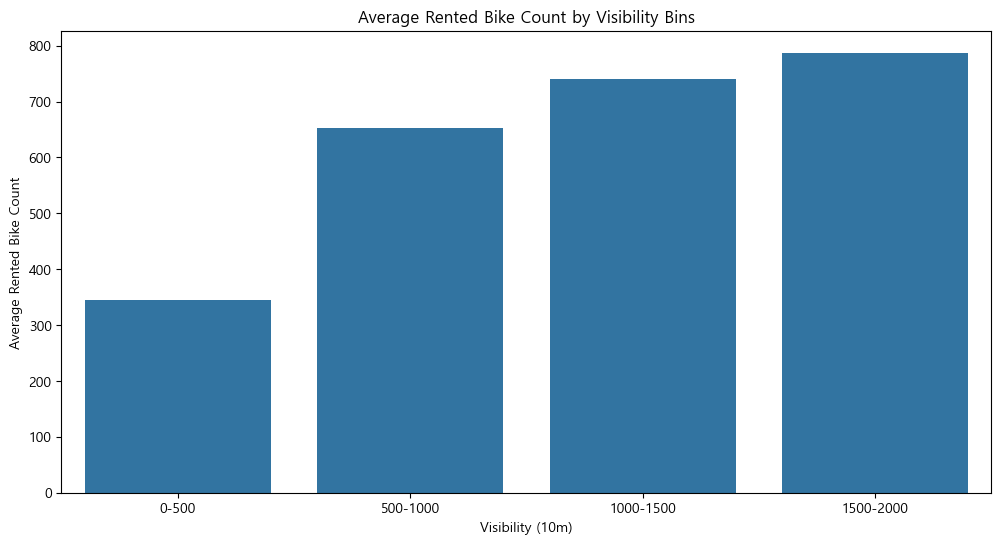

In [112]:
# 가시거리 구간 나누기
# 가시거리는 10미터 단위로 되어있기 때문에 적절한 구간을 설정합니다.
bins = [0, 500, 1000, 1500, 2000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000']
data['Visibility_Bin'] = pd.cut(data['Visibility (10m)'], bins=bins, labels=labels, include_lowest=True)

# 각 구간별 평균 자전거 대여량 계산
visibility_rentals = data.groupby('Visibility_Bin')['Rented Bike Count'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Visibility_Bin', y='Rented Bike Count', data=visibility_rentals)
plt.title('Average Rented Bike Count by Visibility Bins')
plt.xlabel('Visibility (10m)')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 가시거리가 높을수록 자전거 평균 대여량이 많다.

In [90]:
# 가시거리와 날씨의 관계
# 날씨 변수만 따로 저장
weather_vars = ['Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)', 'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

Temperature(째C)              0.033322
Humidity(%)                 -0.537763
Wind speed (m/s)             0.160908
Dew point temperature(째C)   -0.174204
Solar Radiation (MJ/m2)      0.145593
Rainfall(mm)                -0.178202
Snowfall (cm)               -0.110523
Name: Visibility (10m), dtype: float64

c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


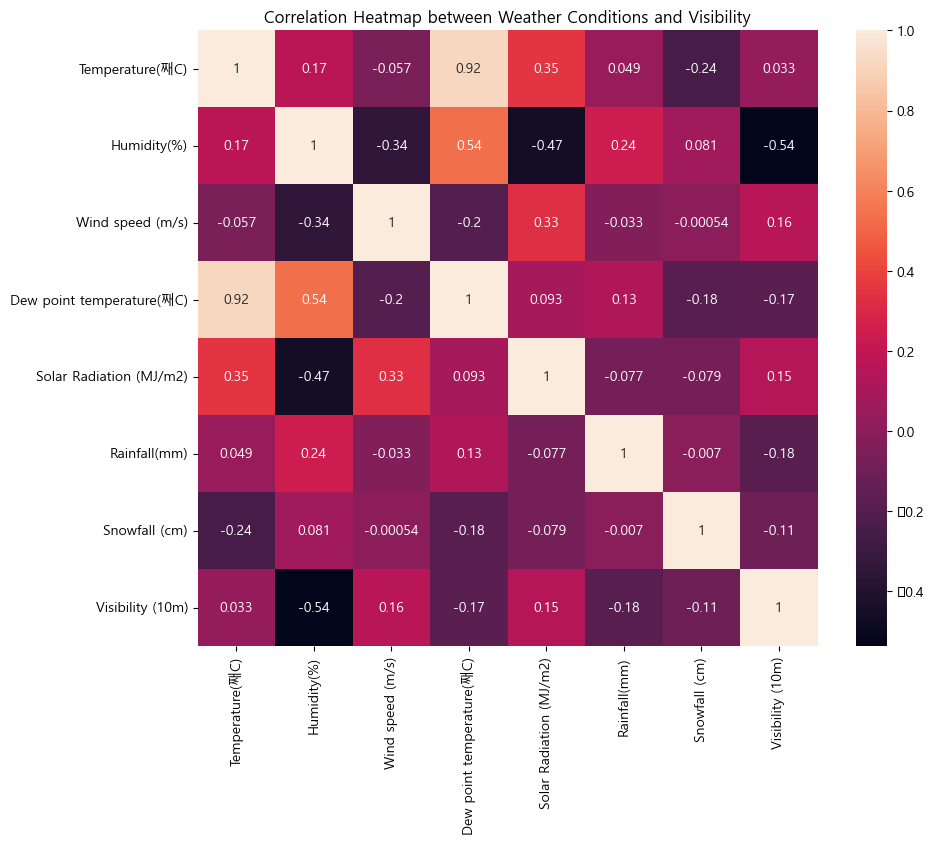

In [97]:
# 날씨 조건들과 가시거리 간의 상관관계
correlation_matrix = data[weather_vars + ['Visibility (10m)']].corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap between Weather Conditions and Visibility')
plt.show()

- 습도와 가시거리는 음의 상관관계를 가지는데 이는 도가 높을수록 가시거리가 감소하는 경향이 있습니다. 이는 습도가 높아질수록 안개가 끼거나 대기 중의 수분 함량이 증가하여 가시거리가 줄어들기 때문이다.
- 습도를 제외한 다른 날씨 변수들은 가시거리와 매우 약한 상관관계를 가진다.


# 6. 강수량별 자전거 대여량

In [103]:
data['Rainfall(mm)'].value_counts()

Rainfall(mm)
0.0     7529
0.5      111
1.0       64
1.5       55
0.1       46
2.0       30
2.5       23
0.2       19
3.5       18
0.4       16
3.0       14
4.0       14
0.3        9
4.5        7
5.5        7
6.0        6
5.0        5
9.5        5
6.5        5
8.0        3
0.8        3
1.6        3
7.0        3
0.9        3
9.0        3
6.4        2
8.5        2
13.0       2
13.5       2
18.5       2
1.1        2
0.7        1
3.3        1
1.4        1
17.0       1
3.7        1
35.0       1
19.0       1
12.5       1
2.4        1
10.0       1
1.9        1
10.5       1
5.4        1
11.5       1
16.0       1
21.5       1
12.0       1
4.9        1
14.5       1
24.0       1
7.5        1
1.3        1
7.3        1
15.5       1
29.5       1
21.0       1
1.2        1
Name: count, dtype: int64

C:\Users\pro_1030\AppData\Local\Temp\ipykernel_16708\1125693289.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_rentals = data.groupby('Rainfall_Bin')['Rented Bike Count'].mean().reset_index()


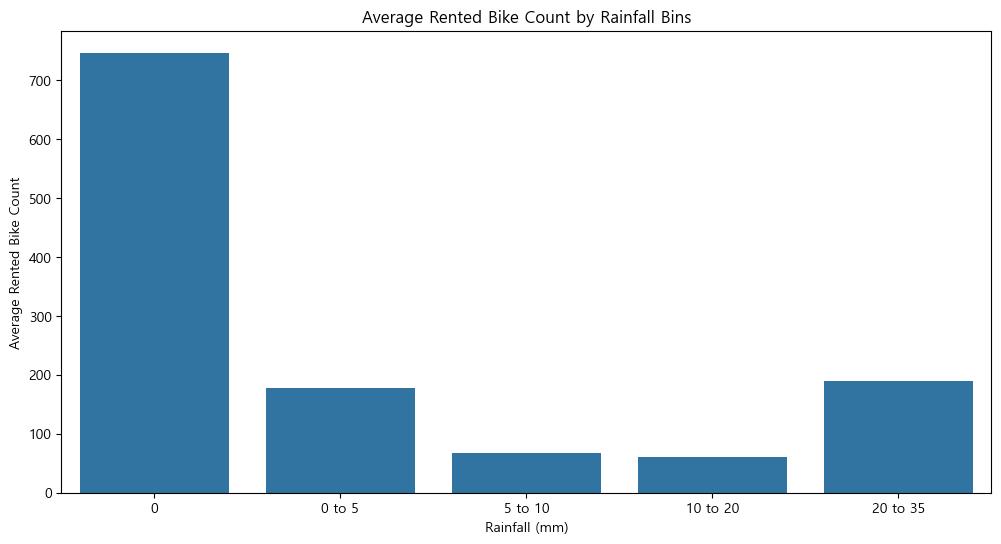

In [105]:
# 강수량 구간 나누기
data['Rainfall_Bin'] = pd.cut(data['Rainfall(mm)'], bins=[-0.1, 0, 5, 10, 20, 35], labels=['0', '0 to 5', '5 to 10', '10 to 20', '20 to 35'])

# 강수량 구간별 평균 자전거 대여량 계산
rainfall_rentals = data.groupby('Rainfall_Bin')['Rented Bike Count'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Rainfall_Bin', y='Rented Bike Count', data=rainfall_rentals)
plt.title('Average Rented Bike Count by Rainfall Bins')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Average Rented Bike Count')
plt.show()

- 강수량의 max값은 35이다.
- 강수량이 0일 때 자전거 대여량이 가장 많다.하지만 강수량이 0일 때의 자료가 월등히 많다.

# 7. 바람 세기별 자전거 대여량

In [118]:
data['Wind speed (m/s)'].value_counts()

Wind speed (m/s)
1.2    331
1.1    331
1.0    321
0.9    319
0.8    303
      ... 
6.1      1
7.3      1
5.4      1
6.9      1
5.7      1
Name: count, Length: 65, dtype: int64

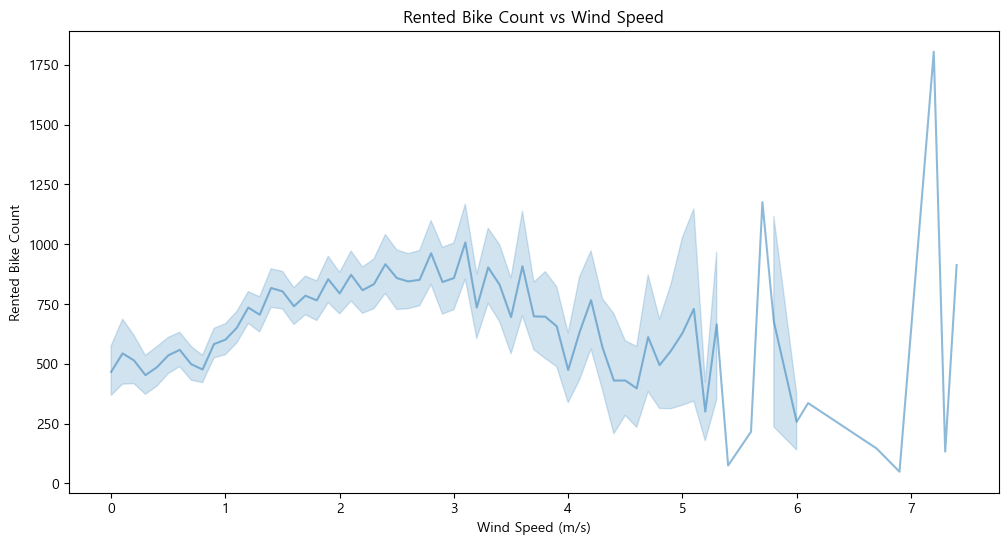

In [117]:
# 바람 세기와 자전거 대여량 간의 관계 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='Wind speed (m/s)', y='Rented Bike Count', data=data, alpha=0.5)
plt.title('Rented Bike Count vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

- 바람세기가 높을 때 대여량이 많으므로 이상치가 있는지 아래의 박스 플롯에서 확인한다.

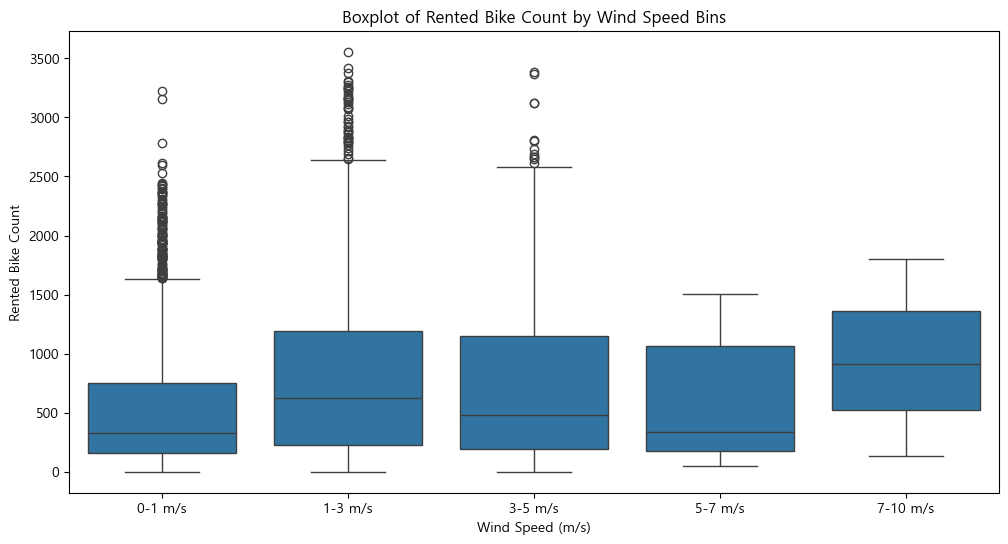

In [121]:
# 바람 세기 구간 나누기
bins = [0, 1, 3, 5, 7, 10]
labels = ['0-1 m/s', '1-3 m/s', '3-5 m/s', '5-7 m/s', '7-10 m/s']
data['Wind_Speed_Bin'] = pd.cut(data['Wind speed (m/s)'], bins=bins, labels=labels, include_lowest=True)

# 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='Wind_Speed_Bin', y='Rented Bike Count', data=data)
plt.title('Boxplot of Rented Bike Count by Wind Speed Bins')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

# 8. 온도별 자전거 대여량

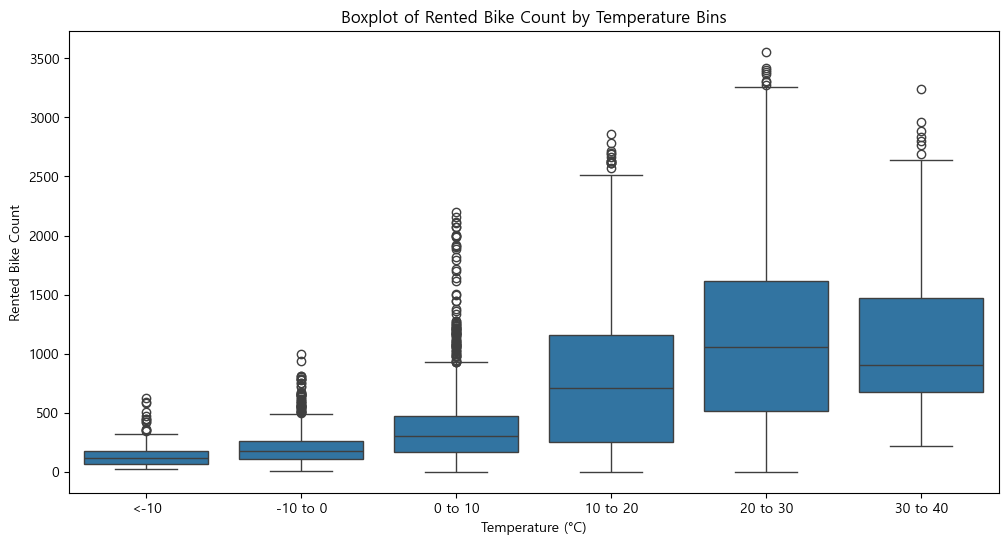

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(data['Temperature(째C)'], bins=[-20, -10, 0, 10, 20, 30, 40], labels=['<-10', '-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40']), y='Rented Bike Count', data=data)
plt.title('Boxplot of Rented Bike Count by Temperature Bins')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

# 9. 태양 복사 에너지에 따른 자전거 대여량

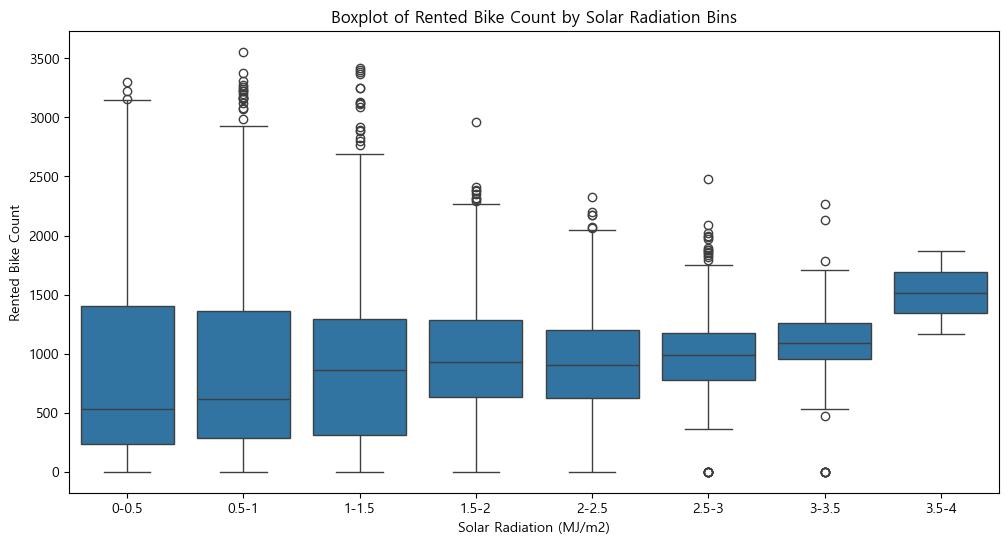

In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(data['Solar Radiation (MJ/m2)'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3','3-3.5','3.5-4']), y='Rented Bike Count', data=data)
plt.title('Boxplot of Rented Bike Count by Solar Radiation Bins')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.show()

- 태양복사 에너지의 max값이 3.52여서 구간을 이렇게 설정했다.

c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


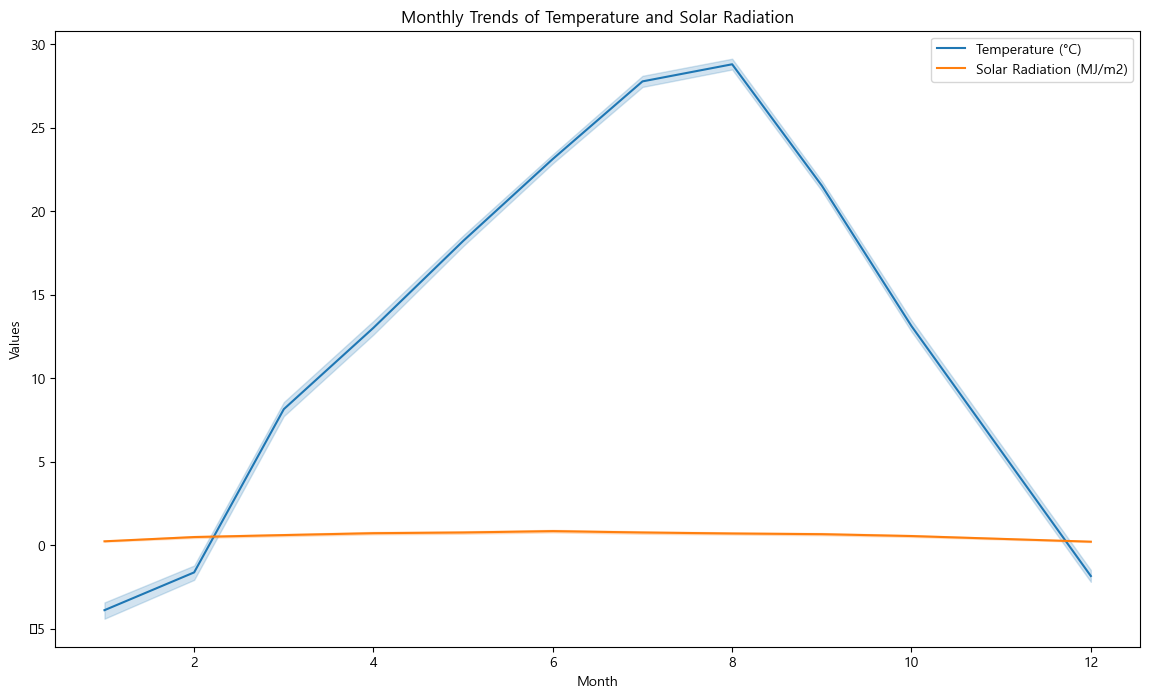

In [134]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='월', y='Temperature(째C)', data=data, label='Temperature (°C)')
sns.lineplot(x='월', y='Solar Radiation (MJ/m2)', data=data, label='Solar Radiation (MJ/m2)')
plt.title('Monthly Trends of Temperature and Solar Radiation')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.show()

- 온도와 태양 복사 에너지 사이에는 상관관계가 없다.

# 10. 강설량별 대여량

In [135]:
data['Snowfall (cm)'].value_counts()

Snowfall (cm)
0.0    7648
1.0      39
0.9      34
0.5      34
0.3      33
0.7      31
2.0      22
0.8      21
1.6      19
2.2      17
0.6      15
0.4      14
0.2      14
3.5      12
2.6      11
1.2       8
2.7       6
2.5       5
1.8       4
4.0       3
4.1       3
1.9       3
3.0       3
3.8       3
1.7       3
3.7       3
2.1       3
0.1       2
1.4       2
4.3       2
1.1       2
2.3       2
2.4       2
4.8       2
3.9       2
1.3       2
3.2       2
3.4       2
5.0       1
5.1       1
3.1       1
4.2       1
3.3       1
1.5       1
2.8       1
Name: count, dtype: int64

In [140]:
monthly_snowfall = data.groupby('월')['Snowfall (cm)'].mean().reset_index()
monthly_snowfall

,월,Snowfall (cm)
0,1,0.255376
1,2,0.102083
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.000000


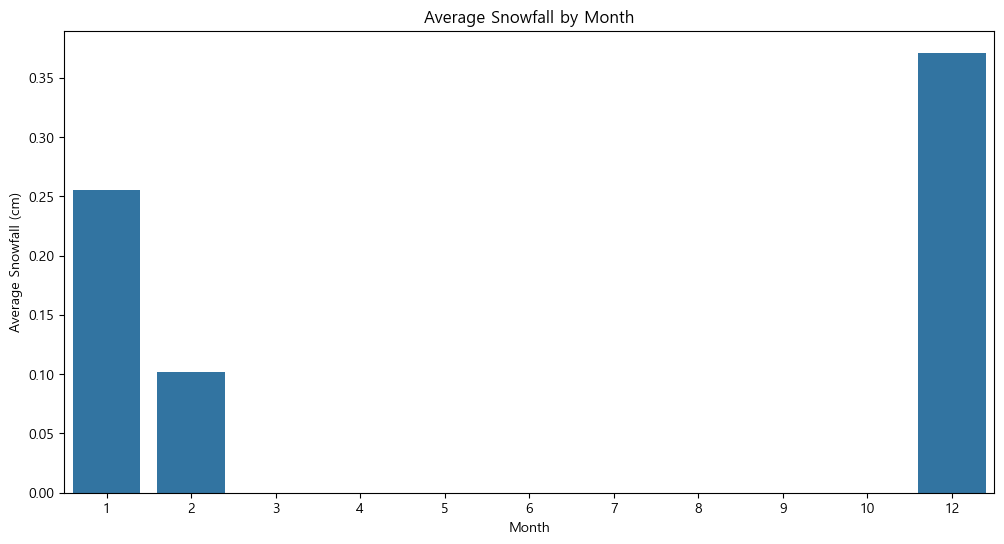

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(x='월', y='Snowfall (cm)', data=monthly_snowfall)
plt.title('Average Snowfall by Month')
plt.xlabel('Month')
plt.ylabel('Average Snowfall (cm)')
plt.show()

- 월별로 평균 강설량을 시각적으로 비교할 수 있다. 일반적으로 겨울철(12월, 1월, 2월)에 강설량이 높고, 여름철(6월, 7월, 8월)에는 강설량이 낮음을 확인할 수 있다.

## 관심있는 주제 및 이유

- "Ecommerce Orders Data Set"
-  사람의 심리가 선택에 반영되고 그 선택이 데이터가 된다는 것에 흥미를 느끼고 있습니다. 이것이 가장 잘 드러나는 분야가 바로 이커머스, 소비 분야라고 생각하여 이커머스의 데이터를 분석해보고자 선정하였습니다.

- url : https://www.kaggle.com/datasets/sangamsharmait/ecommerce-orders-data-analysis

### 데이터 스키마

- order.csv
    - order_id(주문번호)
    - customer_id(고객번호)
    - order_status(주문상태 / 전달됨, 배송됨, 기타)
    - order_purchase_timestamp(구매시간)
    - order_approved_at(주문승인시간)
    - order_delivered_carrier_date(운송업체 날짜)
    - order_delivered_customer_date(주문 배달 고객 날짜)
    - order_estimated_delivery_date(주문 예상 배송 날짜)

- customer.csv
    - customer_id(고객번호)
    - customer_unique_id(고객고유번호)
    - customer_zip_code_prefix(고객우편번호)(우편번호의 앞부분으로 지역별로 지정되어 있어 특정 지역, 도시 식별 가능)
    - customer_city(고객도시)
    - customer_state(고객거주지역 / SP, MG, RJ 등 브라질 주의 약어)

- payment.csv
    - order_id(주문번호)
    - payment_sequential(결제순서)(동일한 주문에 대해 여러 결제가 이루어질 경우 각 결제의 순서를 나타냄)
    - payment_type(결제수단종류 / 신용카드, 직불카드, boleto, 바우처, not_defined)
    - payment_installments(할부횟수)(주로 신용카드 결제 시 많이 사용)
    - payment_value(지불금액)

- product.csv
    - product_id(상품번호)
    - product_category_name(제품카테고리)(브라질어 번역 필요)
    - product_name_lenght(제품이름길이)
    - product_description_lenght(제품설명길이)
    - product_photos_qty(제품사진개수)
    - product_weight_g(제품무게)
    - product_length_cm(제품길이)
    - product_height_cm(제품높이)
    - product_width_cm(제품너비)

- item.csv
    - order_id(주문번호)
    - order_item_id(주문 내 항목 번호)
    - product_id(제품번호)
    - seller_id(판매자번호)
    - shipping_limit_date(배송기한)(주문항목이 배송지에 도착해야하는 기한)
    - price(가격)
    - freight_value(배송비)

- sellers.csv
    - seller_id(판매자번호)
    - seller_zip_code_prefix(판매자우편번호)(우편번호의 앞부분으로 지역별로 지정되어 있어 특정 지역, 도시 식별 가능)
    - seller_city (판매자도시)
    - seller_state(판매자거주지역 / SP, MG, RJ 등 브라질 주의 약어)